# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [11]:
#your code here
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53932.000000
mean,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.732007,5.733836,3.538743
std,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.119670,1.111520,0.693649
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,0.293141
25%,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,10.540000,8.060000


In [12]:
#your comments here

## The column price has the highest standard deviation.

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [6]:
#your hypotheses here

## I think, the features that will affect the price most are carat, color and clarity.

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [10]:
#your code here

diamonds.pivot_table(index=['color'], values=['carat', 'clarity', 'depth', 'table', 'price'])

,carat,clarity,depth,price,table
color,,,,,
0,1.162137,2.776353,61.887215,5323.818020,57.812393
1,1.026927,2.964035,61.846385,5091.874954,57.577278
2,0.911799,2.933646,61.836850,4486.669196,57.517811
3,0.771190,3.463425,61.757111,3999.135671,57.288629
4,0.736538,3.133934,61.694582,3724.886397,57.433536
5,0.657867,2.969889,61.662090,3076.752475,57.491201
6,0.657795,2.691513,61.698125,3169.954096,57.404590


**What do you see? Pay special attention to the relationship between price and color.**

In [13]:
#your thoughts here

#The "higher" the color (from 0 to 6), the lower the price. With the exception of color 6, that has a slightly higher price than color 5.

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

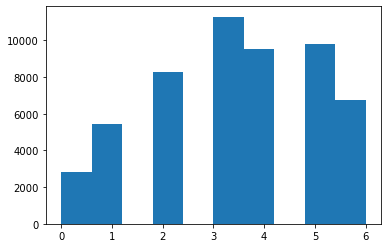

In [19]:
#your code here
plt.hist(diamonds['color'])
plt.show()

In [20]:
#your comments here

## Maybe the amount of diamonds on each color affects the price, while the color increases, the price decreases. But color 6 has fewer diamonds, so the price is higher.

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [24]:
#your code here
diamonds.pivot_table(index=['carat'], values=['color', 'clarity', 'depth', 'table', 'price'])

,clarity,color,depth,price,table
carat,,,,,
0.20,2.833333,5.166667,61.100000,365.166667,59.333333
0.21,2.666667,5.444444,60.511111,380.222222,58.444444
0.22,2.600000,4.800000,61.620000,391.400000,60.400000
0.23,4.901024,4.518771,61.426621,486.143345,58.034130
0.24,4.972441,4.185039,61.599213,505.185039,57.488189
...,...,...,...,...,...
4.00,0.000000,1.000000,63.300000,15984.000000,58.000000
4.01,0.000000,0.500000,61.750000,15223.000000,61.500000
4.13,0.000000,2.000000,64.800000,17329.000000,61.000000


In [25]:
#your comments

## The higher the carat, the higher the price.


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

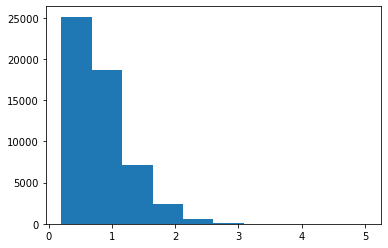

In [26]:
#your code here

plt.hist(diamonds['carat'])
plt.show()

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [29]:
#your code here
diamonds.pivot_table(index=['table'], values=['color', 'clarity', 'depth', 'carat', 'price'])

,carat,clarity,color,depth,price
table,,,,,
43.0,1.0400,4.00,1.0,62.90,4997.0
44.0,0.2900,4.00,5.0,62.80,474.0
49.0,0.6500,3.00,3.0,64.25,2290.5
50.0,1.5100,2.00,3.0,61.50,8995.5
50.1,0.9400,1.00,2.0,66.00,3353.0
...,...,...,...,...,...
71.0,0.6800,2.00,3.0,58.00,1633.0
73.0,0.6025,3.25,4.5,68.90,2406.5
76.0,0.7900,2.00,3.0,65.30,2362.0


In [ ]:
#your comments here

## The table columns doesn't seem to have an apparent relation with the price.

**Finally, do the same with the `clarity` column.**

In [30]:
#your code here
diamonds.pivot_table(index=['clarity'], values=['color', 'table', 'depth', 'carat', 'price'])

,carat,color,depth,price,table
clarity,,,,,
0,1.283846,2.968961,62.734278,3924.168691,58.303779
1,1.077648,3.469980,61.772167,5063.028606,57.927181
2,0.850482,3.448450,61.853042,3996.001148,57.662541
3,0.763935,3.494208,61.724417,3924.989395,57.417401
4,0.727158,3.161792,61.667458,3839.455391,57.315151
5,0.596202,3.569483,61.663778,3283.737071,57.024990
6,0.503321,3.351573,61.624651,2523.114637,56.884460
7,0.505123,3.101676,61.510615,2864.839106,56.507207


In [31]:
#your comments here

## Same as table, the clarity doesn't have a strong relation with the price.

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [32]:
#your thoughts here

## It looks like carat affect the price the most, but, on top of that, scarcity is the variable that affects the price the most.
## Certain diamonds with specific colors and carats have a higher price because they are more difficult to find.

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


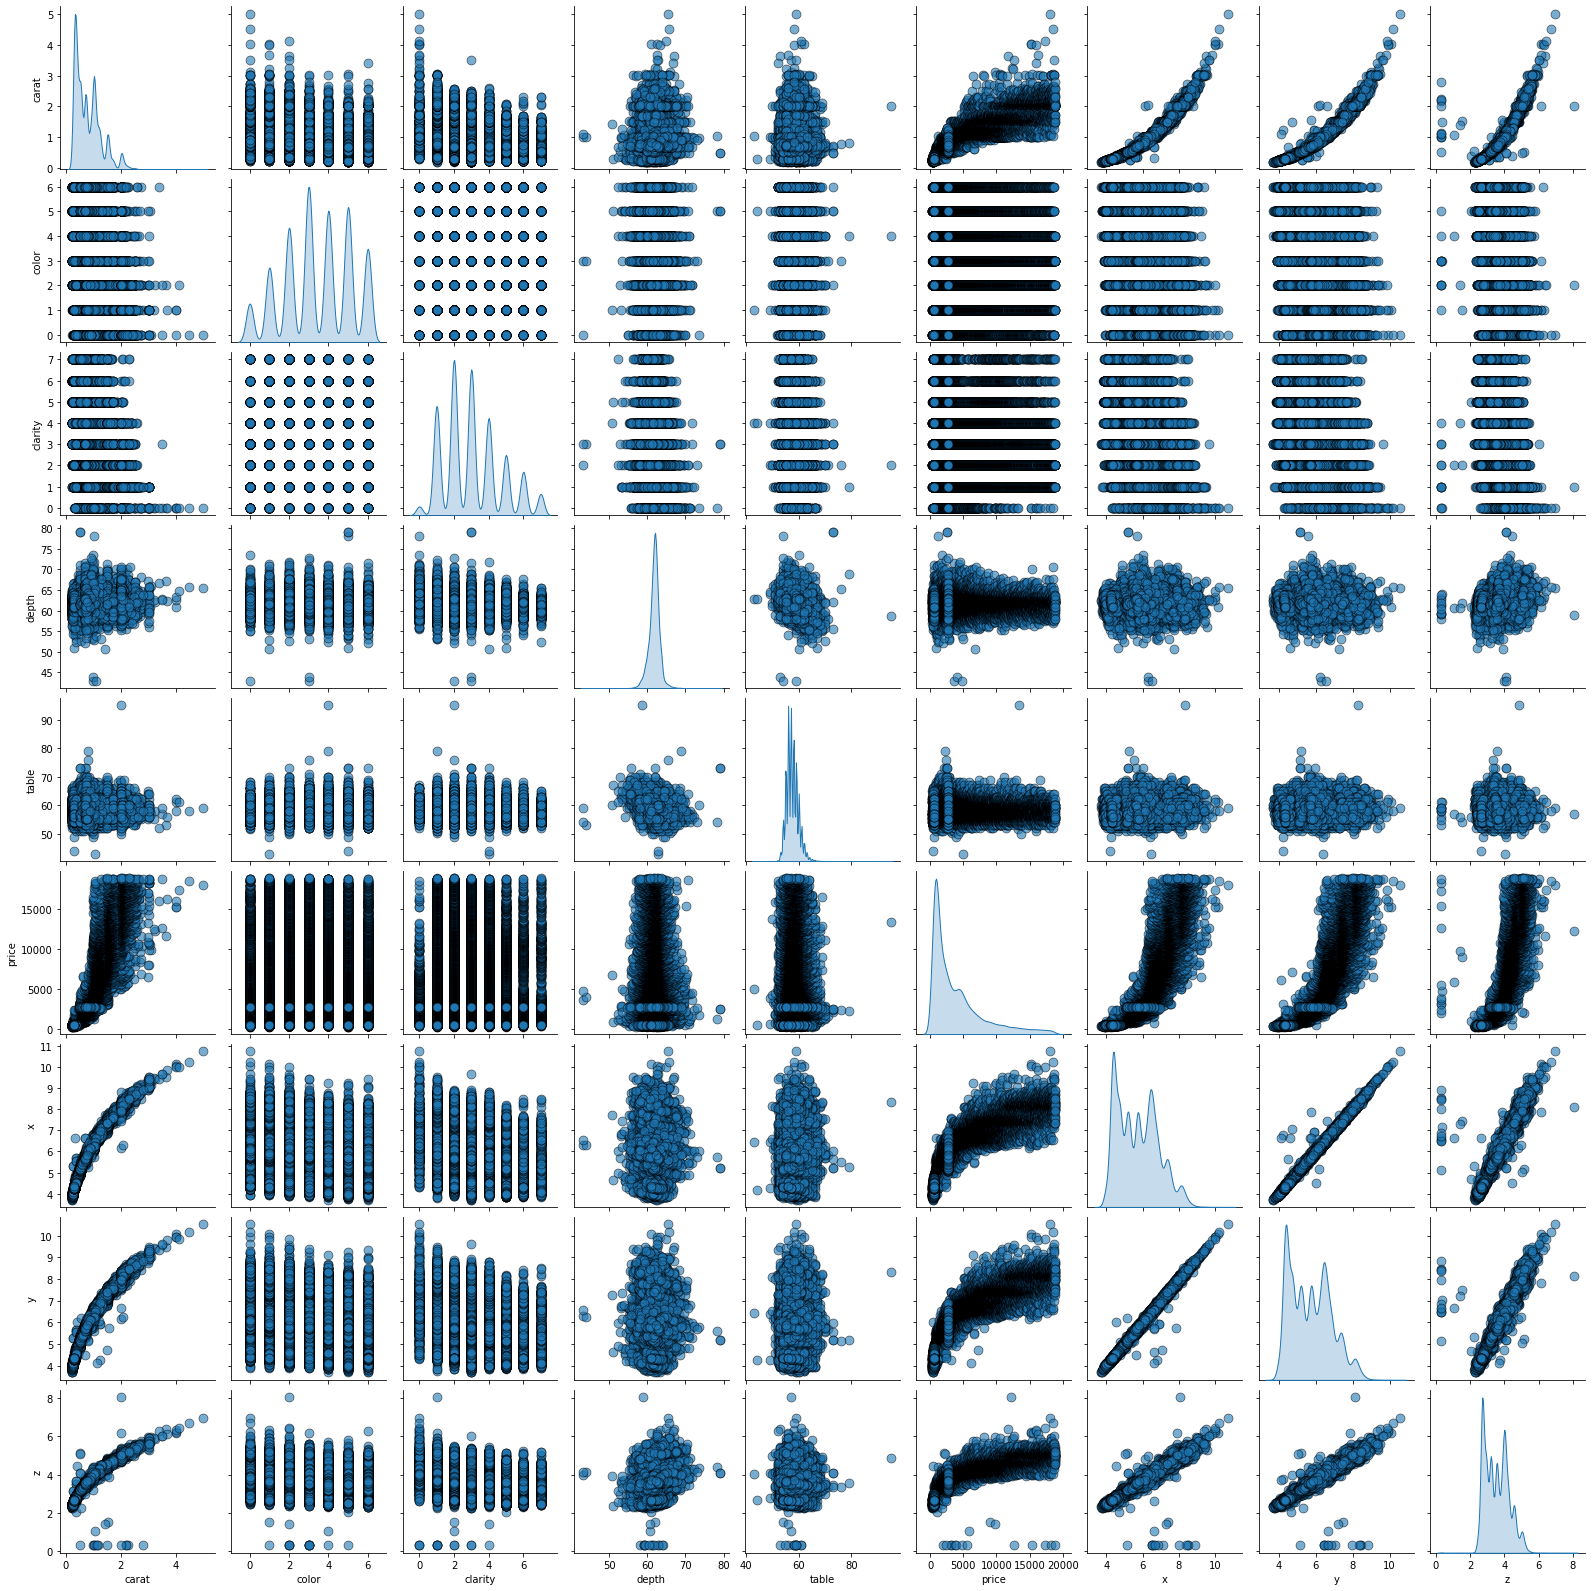

In [34]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.show()

**What do you see here? What relationships between variables are the most interesting?**

In [35]:
#your thoughts here

## As I mentioned before, the number of diamonds by carat has a tigth relation with its price.

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

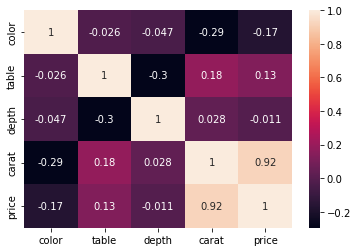

In [38]:
# your code here

correlation = diamonds[['color', 'table', 'depth', 'carat', 'price']].corr()
sns.heatmap(correlation, annot=True)
plt.show()

**What do you see here? Regarding the results before, does it fit with them?**

In [39]:
#your thoughts here

## Yes, as expected, the weight of the diamond affects the price.

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

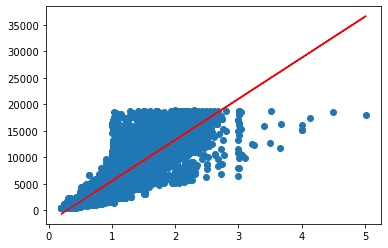

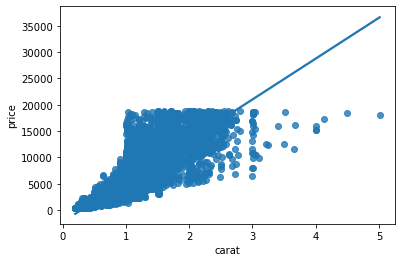

Mean Squared Error:


2397955.0500126793

In [51]:
# your code here
x = diamonds[['carat']]
y = diamonds['price']
model = linear_model.LinearRegression()
model.fit(x,y)

y_hat = model.intercept_ + model.coef_ * x

## With matplotlib
plt.plot(x.values, y_hat.values, c='r')
plt.scatter(x,y)
plt.show()

## I also found this way to do it with Seaborn
sns.regplot(x = diamonds[['carat']], y = diamonds['price'], data=diamonds)
plt.show()

print('Mean Squared Error:')
mean_squared_error(y_hat, y)

**What do you think?**

In [53]:
#your thoughts here

## The Mean Squared Error is very high, and it might be related with the price, since the values are, by far, the highest values of the dataset compared with the rest.

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [54]:
#your thoughts here

## Based on the previous analysis, the rest of the features have a lower impact on the price compared with the weight.

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.